<a href="https://colab.research.google.com/github/hui0041600/ToDo-List-Manager/blob/main/Project1_Hui_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Enviorment

In [ ]:
!pip install tensorflow
!pip install tensorflow_data_validation
!pip install pandas
!pip install numpy
!pip install fastparquet
!pip install matplotlib
!pip install seaborn
!apt-get install graphviz -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow-serving-api to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple v

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import fastparquet
import tensorflow as tf
import tensorflow_data_validation as tfdv

## **Prepare Dataset**

In [ ]:
#Load datasets
# Read the Parquet files
march_data = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine='fastparquet')
may_data = pd.read_parquet('yellow_tripda。ta_2020-05.parquet', engine='fastparquet')

NameError: name 'pd' is not defined

In [ ]:
#Reading datasets header

print("March Data:")
display(march_data.head())

print("\nMay Data:")
display(may_data.head())


In [ ]:
#The shape of the data (number of rows and columns)

print("March Data Shape:", march_data.shape)
print("May Data Shape:", may_data.shape)


March Data Shape: (3007687, 19)
May Data Shape: (348415, 19)


### **Missing Values**

In [ ]:
#Check for missing values in the datasets

#March
march_missing_values = march_data.isnull().sum()
print("March Data Missing Values:")
print(march_missing_values)

#May
may_missing_values = may_data.isnull().sum()
print("\nMay Data Missing Values:")
print(may_missing_values)


In [ ]:
#Drop columns with more than 50% missing values

threshold = 0.5  # 50% adjusted
march_data_dropped = march_data.dropna(thresh=int(march_data.shape[0] * (1 - threshold)), axis=1)
may_data_dropped = may_data.dropna(thresh=int(may_data.shape[0] * (1 - threshold)), axis=1)

print("March Data after dropping columns with more than 50% missing values:")
print(march_data_dropped.shape)

print("May Data after dropping columns with more than 50% missing values:")
print(may_data_dropped.shape)


March Data after dropping columns with more than 50% missing values:
(3007687, 18)
May Data after dropping columns with more than 50% missing values:
(348415, 18)


In [ ]:
#DISPLAY the header after drop missing vcalues

print("March Data Header after dropping columns with more than 50% missing values:")
display(march_data_dropped.head())

print("\nMay Data Header after dropping columns with more than 50% missing values:")
display(may_data_dropped.head())


March Data Header after dropping columns with more than 50% missing values:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5



May Data Header after dropping columns with more than 50% missing values:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1,12.2,3.0,0.5,2.4,0.0,0.3,18.4,2.5
1,1,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,1.0,N,264,264,1,4.0,0.5,0.5,0.5,0.0,0.3,5.8,0.0
2,1,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,1.0,N,264,264,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0
3,1,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,1.0,N,107,229,2,7.0,3.0,0.5,0.0,0.0,0.3,10.8,2.5
4,1,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,N,237,262,1,6.0,3.0,0.5,1.2,0.0,0.3,11.0,2.5


In [ ]:
# Fill remaining missing values

# Fill missing values in numerical columns with the mean
numerical_cols = march_data_dropped.select_dtypes(include=['number']).columns
march_data_filled = march_data_dropped.copy()
may_data_filled = may_data_dropped.copy()

march_data_filled[numerical_cols] = march_data_filled[numerical_cols].fillna(march_data_filled[numerical_cols].mean())
may_data_filled[numerical_cols] = may_data_filled[numerical_cols].fillna(may_data_filled[numerical_cols].mean())

# Fill missing values in categorical columns with the mode
categorical_cols = march_data_dropped.select_dtypes(include=['object']).columns
for col in categorical_cols:
  march_data_filled[col] = march_data_filled[col].fillna(march_data_filled[col].mode()[0])
  may_data_filled[col] = may_data_filled[col].fillna(may_data_filled[col].mode()[0])

print("March Data Missing Values after filling:")
print(march_data_filled.isnull().sum())

print("\nMay Data Missing Values after filling:")
print(may_data_filled.isnull().sum())


March Data Missing Values after filling:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

May Data Missing Values after filling:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_sur

In [ ]:
# Check any remaining missing values
march_remaining_missing = march_data_filled.isnull().sum().sum()
may_remaining_missing = may_data_filled.isnull().sum().sum()

print("Remaining missing values in March data:", march_remaining_missing)
print("Remaining missing values in May data:", may_remaining_missing)


Remaining missing values in March data: 0
Remaining missing values in May data: 0


# **Outlier Detection:**
**Use the trip distance and trip duration columns to identify outliers**

In [ ]:
# Convert to datetime format & Create trip_duration (in minutes) feature if not already present

import pandas as pd
# Convert to datetime format
march_data_filled['tpep_pickup_datetime'] = pd.to_datetime(march_data_filled['tpep_pickup_datetime'])
march_data_filled['tpep_dropoff_datetime'] = pd.to_datetime(march_data_filled['tpep_dropoff_datetime'])

may_data_filled['tpep_pickup_datetime'] = pd.to_datetime(may_data_filled['tpep_pickup_datetime'])
may_data_filled['tpep_dropoff_datetime'] = pd.to_datetime(may_data_filled['tpep_dropoff_datetime'])

# Create trip_duration (in minutes) feature
march_data_filled['trip_duration'] = (march_data_filled['tpep_dropoff_datetime'] - march_data_filled['tpep_pickup_datetime']).dt.total_seconds() / 60
may_data_filled['trip_duration'] = (may_data_filled['tpep_dropoff_datetime'] - may_data_filled['tpep_pickup_datetime']).dt.total_seconds() / 60

print("March Data with Trip Duration in Minutes:")
display(march_data_filled[['trip_duration']].head())
print("March Data with Trip Duration in Minutes:")
display(march_data_filled[['trip_duration']].head())


March Data with Trip Duration in Minutes:


,trip_duration
0,30.483333
1,0.450000
2,6.966667
3,3.066667
4,15.133333


March Data with Trip Duration in Minutes:


,trip_duration
0,30.483333
1,0.450000
2,6.966667
3,3.066667
4,15.133333


# **Identify and Remove Outliers**


Boxplot to detect outliers in 'trip_distance' and 'trip_duration'

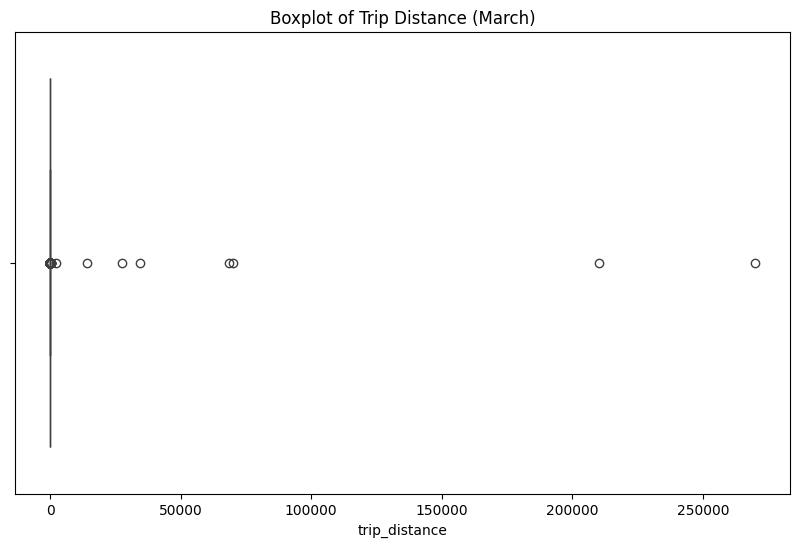

In [ ]:
# Boxplot for trip distance in March data
plt.figure(figsize=(10, 6))
sns.boxplot(x=march_data_filled['trip_distance'])
plt.title('Boxplot of Trip Distance (March)')
plt.show()

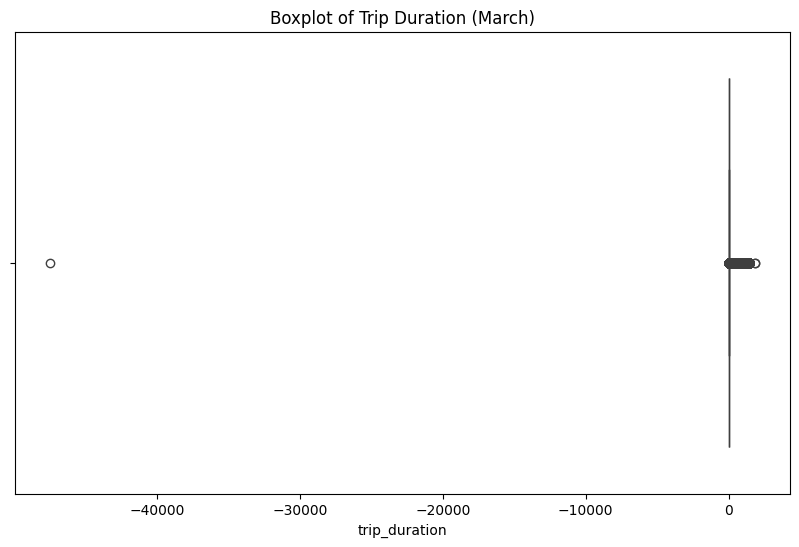

In [ ]:
# Boxplot for trip duration in March data
plt.figure(figsize=(10, 6))
sns.boxplot(x=march_data_filled['trip_duration'])
plt.title('Boxplot of Trip Duration (March)')
plt.show()

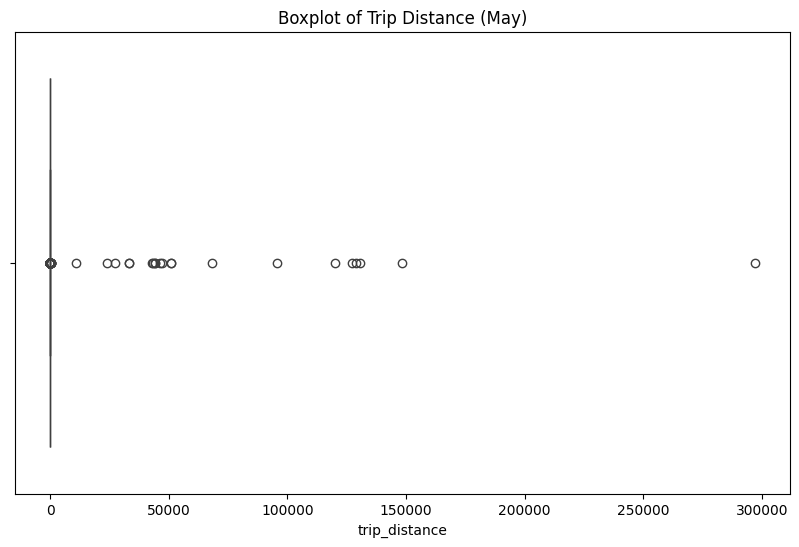

In [ ]:
# Boxplot for trip distance in May data
plt.figure(figsize=(10, 6))
sns.boxplot(x=may_data_filled['trip_distance'])
plt.title('Boxplot of Trip Distance (May)')
plt.show()

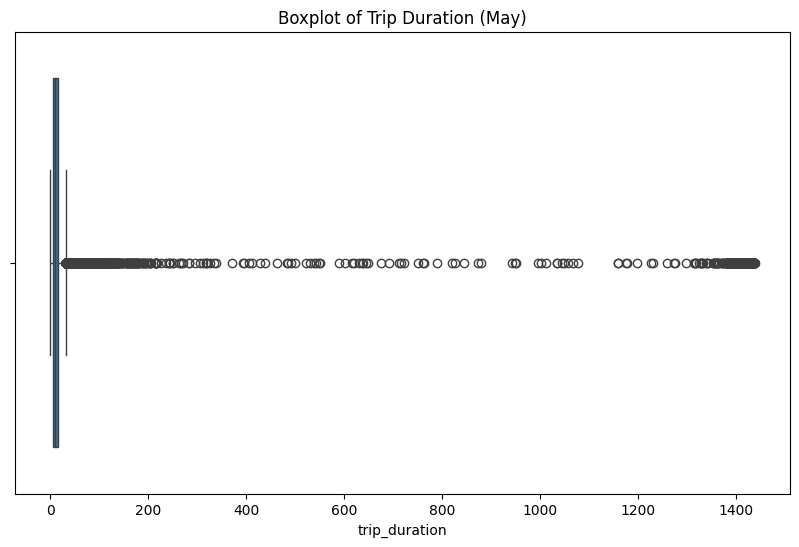

In [ ]:
# Boxplot for trip duration in May data
plt.figure(figsize=(10, 6))
sns.boxplot(x=may_data_filled['trip_duration'])
plt.title('Boxplot of Trip Duration (May)')
plt.show()

In [ ]:
#Function to remove outliers based on IQR (Interquartile Range)

def remove_outliers_iqr(df, column):

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers


In [ ]:
# Remove outliers for 'trip_distance' and 'trip_duration'

march_data_no_outliers = remove_outliers_iqr(march_data_filled, 'trip_distance')
march_data_no_outliers = remove_outliers_iqr(march_data_no_outliers, 'trip_duration')

may_data_no_outliers = remove_outliers_iqr(may_data_filled, 'trip_distance')
may_data_no_outliers = remove_outliers_iqr(may_data_no_outliers, 'trip_duration')

print("March Data Shape after removing outliers:", march_data_no_outliers.shape)
print("May Data Shape after removing outliers:", may_data_no_outliers.shape)


March Data Shape after removing outliers: (2603390, 19)
May Data Shape after removing outliers: (300466, 19)


In [ ]:
#DISPLAY the header after removing outliers

print("March Data Header after removing outliers:")
display(march_data_no_outliers.head())

print("\nMay Data Header after removing outliers:")
display(may_data_no_outliers.head())


March Data Header after removing outliers:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0,0.450000
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,6.966667
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,3.066667
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,15.133333
5,1,2020-03-01 00:04:43,2020-03-01 00:23:17,1.0,3.50,1.0,Y,113,142,1,15.0,3.0,0.5,3.75,0.0,0.3,22.55,2.5,18.566667



May Data Header after removing outliers:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,1.0,N,234,256,1,12.2,3.0,0.5,2.4,0.0,0.3,18.4,2.5,15.650000
1,1,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,1.0,N,264,264,1,4.0,0.5,0.5,0.5,0.0,0.3,5.8,0.0,2.666667
2,1,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,1.0,N,264,264,2,3.5,0.5,0.5,0.0,0.0,0.3,4.8,0.0,2.216667
3,1,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,1.0,N,107,229,2,7.0,3.0,0.5,0.0,0.0,0.3,10.8,2.5,5.600000
4,1,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,1.0,N,237,262,1,6.0,3.0,0.5,1.2,0.0,0.3,11.0,2.5,6.116667


In [ ]:
# Save Cleaned Data

# Save the cleaned March and May datasets to Parquet files
march_data_no_outliers.to_parquet('yellow_tripdata_2020-03_cleaned.parquet', engine='fastparquet')
may_data_no_outliers.to_parquet('yellow_tripdata_2020-05_cleaned.parquet', engine='fastparquet')

print("Cleaned March data saved to 'yellow_tripdata_2020-03_cleaned.parquet'")
print("Cleaned May data saved to 'yellow_tripdata_2020-05_cleaned.parquet'")


Cleaned March data saved to 'yellow_tripdata_2020-03_cleaned.parquet'
Cleaned May data saved to 'yellow_tripdata_2020-05_cleaned.parquet'


# **List all feature data types**

In [ ]:
#  Using the cleaned datasets (data without outliers)

print("March Data Feature Data Types:")
print(march_data_no_outliers.dtypes)

print("\nMay Data Feature Data Types:")
print(may_data_no_outliers.dtypes)


March Data Feature Data Types:
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
trip_duration                   float64
dtype: object

May Data Feature Data Types:
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_

# **Categorize features by data type**

In [ ]:
# Get all numerical features features March and may

numerical_features_march = march_data_no_outliers.select_dtypes(include=['number']).columns.tolist()
numerical_features_may = may_data_no_outliers.select_dtypes(include=['number']).columns.tolist()

print("Numerical features in March data:", numerical_features_march)
print("Numerical features in May data:", numerical_features_may)


Numerical features in March data: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_duration']
Numerical features in May data: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_duration']


In [ ]:
# Get all categorical features

categorical_features_march = march_data_no_outliers.select_dtypes(include=['object']).columns
categorical_features_may = may_data_no_outliers.select_dtypes(include=['object']).columns

print("March Categorical Features:", categorical_features_march)
print("May Categorical Features:", categorical_features_may)


March Categorical Features: Index(['store_and_fwd_flag'], dtype='object')
May Categorical Features: Index(['store_and_fwd_flag'], dtype='object')


In [ ]:
# Get all boolean features

boolean_features_march = march_data_no_outliers.select_dtypes(include=['bool']).columns
boolean_features_may = may_data_no_outliers.select_dtypes(include=['bool']).columns

print("March Boolean Features:", boolean_features_march)
print("May Boolean Features:", boolean_features_may)


March Boolean Features: Index([], dtype='object')
May Boolean Features: Index([], dtype='object')


In [ ]:
# Display the categorized results

print("March Numerical Features:", list(numerical_features_march))
print("May Numerical Features:", list(numerical_features_may))

print("\nMarch Categorical Features:", list(categorical_features_march))
print("May Categorical Features:", list(categorical_features_may))

print("\nMarch Boolean Features:", list(boolean_features_march))
print("May Boolean Features:", list(boolean_features_may))


March Numerical Features: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_duration']
May Numerical Features: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'trip_duration']

March Categorical Features: ['store_and_fwd_flag']
May Categorical Features: ['store_and_fwd_flag']

March Boolean Features: []
May Boolean Features: []


In [ ]:
# Count the number of features in each category

print("Number of numerical features in March data:", len(numerical_features_march))
print("Number of numerical features in May data:", len(numerical_features_may))

print("Number of categorical features in March data:", len(categorical_features_march))
print("Number of categorical features in May data:", len(categorical_features_may))

print("Number of boolean features in March data:", len(boolean_features_march))
print("Number of boolean features in May data:", len(boolean_features_may))


Number of numerical features in March data: 16
Number of numerical features in May data: 16
Number of categorical features in March data: 1
Number of categorical features in May data: 1
Number of boolean features in March data: 0
Number of boolean features in May data: 0


# **Classic EDA Approach using Pandas and Numpy**

## Feature Engineering and Visualization

In [ ]:
# Summary statistics for numerical features

print("Summary Statistics for Numerical Features in 'March' Data:")
display(march_data_no_outliers.describe())

Summary Statistics for Numerical Features in 'March' Data:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
count,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06,2.603390e+06
mean,1.666571e+00,1.464951e+00,1.769750e+00,1.026256e+00,1.654487e+02,1.636138e+02,1.257909e+00,9.555717e+00,1.290657e+00,6.855650e-01,1.752873e+00,2.728825e-02,2.975634e-01,1.514434e+01,2.319601e+00,1.020617e+01
std,4.731739e-01,1.116852e+00,1.188396e+00,6.821211e-01,6.721672e+01,6.963469e+01,4.832703e-01,4.159691e+02,3.098871e+02,3.098849e+02,1.951445e+00,4.946968e-01,3.751351e-02,7.464253e+02,6.732502e-01,5.751136e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.259000e+03,-7.000000e+00,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00,-8.666667e-01
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.140000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.079000e+01,2.500000e+00,5.750000e+00
50%,2.000000e+00,1.000000e+00,1.460000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.350000e+01,2.500000e+00,9.183333e+00
75%,2.000000e+00,1.000000e+00,2.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.150000e+01,2.500000e+00,5.000000e-01,2.640000e+00,0.000000e+00,3.000000e-01,1.716000e+01,2.500000e+00,1.378333e+01
max,6.000000e+00,9.000000e+00,6.050000e+00,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,8.000000e+02,9.912000e+01,3.000000e-01,1.000004e+06,2.500000e+00,2.708333e+01


In [ ]:
print("\nSummary Statistics for Numerical Features in 'May' Data:")
display(may_data_no_outliers.describe())


Summary Statistics for Numerical Features in 'May' Data:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
count,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000,300466.000000
mean,1.599326,1.313270,2.280955,1.033958,155.638275,150.693836,1.275465,11.294838,1.044328,0.491053,1.375579,0.107867,0.296922,15.768748,2.068194,8.887329
std,0.491365,0.930555,1.869954,0.919341,71.000652,74.092603,0.681611,783.563239,1.266303,0.082172,1.946205,0.947942,0.041994,783.683509,0.913911,5.408802
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-99.560000,-4.500000,-0.500000,-11.060000,-11.750000,-0.300000,-100.360000,-2.500000,-0.333333
25%,1.000000,1.000000,0.980000,1.000000,97.000000,76.000000,1.000000,5.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,2.037772,4.700000
50%,2.000000,1.000000,1.700000,1.000000,151.000000,145.000000,1.000000,8.000000,0.500000,0.500000,1.000000,0.000000,0.300000,12.800000,2.500000,7.766667
75%,2.000000,1.314171,3.000000,1.000000,234.000000,233.000000,2.000000,12.000000,2.500000,0.500000,2.360000,0.000000,0.300000,17.160000,2.500000,12.150000
max,6.000000,9.000000,9.050000,99.000000,265.000000,265.000000,4.000000,429496.720000,65.530000,3.300000,200.000000,200.000000,0.300000,429562.250000,2.500000,25.000000


In [ ]:
# Correlation matrix for March data

correlation_matrix_march = march_data_no_outliers.corr()
print("Correlation Matrix for March Data:")
display(correlation_matrix_march)


<ipython-input-29-0480fc03c7be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_march = march_data_no_outliers.corr()


Correlation Matrix for March Data:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
VendorID,1.000000,0.197100,0.027807,0.008154,-0.011138,-0.005820,-0.025550,-0.000752,-0.003106,0.000427,0.010624,0.002479,-0.043550,-0.000055,-0.015259,-0.000381
passenger_count,0.197100,1.000000,0.011044,-0.005029,-0.005135,-0.002811,0.001435,0.000924,-0.000942,-0.000256,-0.000659,-0.001488,0.006360,0.000316,0.011201,0.010800
trip_distance,0.027807,0.011044,1.000000,-0.037716,-0.050416,-0.075615,-0.070268,0.008019,-0.000920,-0.000911,0.233299,0.054033,0.043848,0.004414,0.048218,0.741654
RatecodeID,0.008154,-0.005029,-0.037716,1.000000,0.001367,0.010634,0.010359,0.002992,0.088904,0.088983,0.070018,0.070807,-0.035555,0.075705,-0.089307,-0.048476
PULocationID,-0.011138,-0.005135,-0.050416,0.001367,1.000000,0.118245,-0.033904,-0.000317,0.000381,0.000256,0.018262,-0.006905,0.005024,0.000206,0.140733,-0.021192
DOLocationID,-0.005820,-0.002811,-0.075615,0.010634,0.118245,1.000000,-0.033570,-0.000540,0.000350,0.000262,0.019166,-0.001882,0.002264,0.000073,0.119035,-0.041798
payment_type,-0.025550,0.001435,-0.070268,0.010359,-0.033904,-0.033570,1.000000,0.002058,0.000856,0.000907,-0.481381,-0.012957,-0.259042,0.000425,-0.245948,-0.094927
fare_amount,-0.000752,0.000924,0.008019,0.002992,-0.000317,-0.000540,0.002058,1.000000,-0.000009,-0.000010,0.004712,0.003112,0.002803,0.557287,0.000021,0.008274
extra,-0.003106,-0.000942,-0.000920,0.088904,0.000381,0.000350,0.000856,-0.000009,1.000000,0.999992,-0.000456,-0.000062,-0.004619,0.830304,-0.001392,0.000230
mta_tax,0.000427,-0.000256,-0.000911,0.088983,0.000256,0.000262,0.000907,-0.000010,0.999992,1.000000,-0.000555,-0.000044,-0.004719,0.830308,-0.002040,0.000165


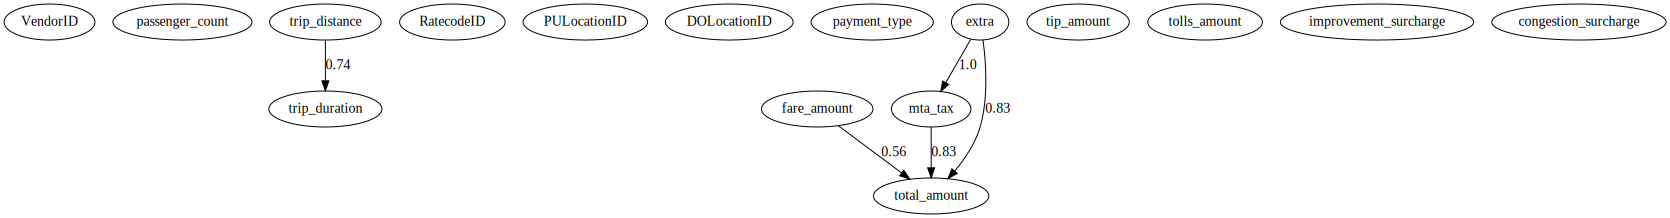

In [ ]:
# Visualize the correlation matrix using GraphViz

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.preprocessing import LabelEncoder
dot = graphviz.Digraph(comment='Correlation Matrix')
for column in correlation_matrix_march.columns:
    dot.node(column)

for i in range(len(correlation_matrix_march.columns)):
    for j in range(i + 1, len(correlation_matrix_march.columns)):
        column1 = correlation_matrix_march.columns[i]
        column2 = correlation_matrix_march.columns[j]
        correlation = correlation_matrix_march.loc[column1, column2]
        if abs(correlation) > 0.5:  # 50%
            dot.edge(column1, column2, label=str(round(correlation, 2)))
dot




In [ ]:
# Correlation matrix for May data

correlation_matrix_may = may_data_no_outliers.corr()
print("Correlation Matrix for May Data:")
display(correlation_matrix_may)


<ipython-input-31-a329a2a2dc3f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_may = may_data_no_outliers.corr()


Correlation Matrix for May Data:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
VendorID,1.000000,0.237583,0.132126,0.006683,-0.047592,-0.029595,-0.158687,-0.001595,-0.811941,-0.052292,-0.007034,0.047834,-0.054160,-0.001735,-0.015612,0.081661
passenger_count,0.237583,1.000000,0.016371,-0.009483,-0.008697,-0.001045,-0.009879,-0.000613,-0.199961,0.008218,0.003863,-0.001628,0.003871,-0.000606,0.001681,0.013143
trip_distance,0.132126,0.016371,1.000000,-0.024442,-0.066362,-0.074576,-0.245139,0.003740,-0.076626,0.028207,0.159272,0.239246,0.042964,0.004379,0.079337,0.808047
RatecodeID,0.006683,-0.009483,-0.024442,1.000000,0.001703,0.009080,0.002582,0.195241,-0.004743,-0.090832,0.007768,0.015245,-0.066940,0.195198,-0.055488,-0.026360
PULocationID,-0.047592,-0.008697,-0.066362,0.001703,1.000000,0.141546,0.014111,-0.000884,0.103965,0.011901,0.067788,-0.025881,0.004430,-0.000404,0.234728,-0.086443
DOLocationID,-0.029595,-0.001045,-0.074576,0.009080,0.141546,1.000000,0.002008,-0.000701,0.078457,0.002430,0.057480,-0.009306,0.000405,-0.000307,0.178676,-0.102173
payment_type,-0.158687,-0.009879,-0.245139,0.002582,0.014111,0.002008,1.000000,0.002503,0.144955,-0.141038,-0.354894,-0.112547,-0.207262,0.001567,-0.171702,-0.240479
fare_amount,-0.001595,-0.000613,0.003740,0.195241,-0.000884,-0.000701,0.002503,1.000000,0.092106,-0.010352,0.000354,0.001870,-0.011285,0.999994,-0.004131,0.003047
extra,-0.811941,-0.199961,-0.076626,-0.004743,0.103965,0.078457,0.144955,0.092106,1.000000,0.090373,0.068634,-0.063102,0.072843,0.092862,0.306666,-0.082584
mta_tax,-0.052292,0.008218,0.028207,-0.090832,0.011901,0.002430,-0.141038,-0.010352,0.090373,1.000000,0.046185,-0.014601,0.833936,-0.009702,0.284754,0.047501


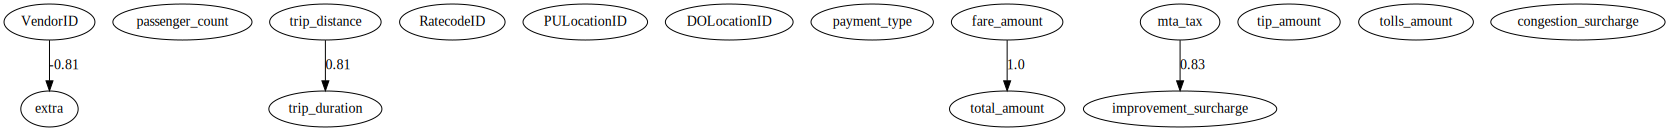

In [ ]:
# Visualize the correlation matrix using a GraphViz library
dot = graphviz.Digraph(comment='Correlation Matrix')
for column in correlation_matrix_may.columns:
    dot.node(column)
for i in range(len(correlation_matrix_may.columns)):
    for j in range(i + 1, len(correlation_matrix_may.columns)):
        column1 = correlation_matrix_may.columns[i]
        column2 = correlation_matrix_may.columns[j]
        correlation = correlation_matrix_may.loc[column1, column2]
        if abs(correlation) > 0.5:  #50%
            dot.edge(column1, column2, label=str(round(correlation, 2)))
dot


# **Feature Importance Analysis**

In [ ]:
def present_dependencies(correlation_matrix, threshold=0.5):


  dependencies = {}
  for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
      column1 = correlation_matrix.columns[i]
      column2 = correlation_matrix.columns[j]
      correlation = correlation_matrix.loc[column1, column2]
      if abs(correlation) > threshold:
        if column1 not in dependencies:
          dependencies[column1] = []
        if column2 not in dependencies:
          dependencies[column2] = []
        dependencies[column1].append((column2, correlation))
        dependencies[column2].append((column1, correlation))
  return dependencies

In [ ]:
# Find dependencies for March and May data
dependencies_march = present_dependencies(correlation_matrix_march)
dependencies_may = present_dependencies(correlation_matrix_may)


print("Dependencies in March data:")
for feature, related_features in dependencies_march.items():
  print(f"{feature}:")
  for related_feature, correlation in related_features:
    print(f"  - {related_feature} (Correlation: {correlation:.2f})")

print("\nDependencies in May data:")
for feature, related_features in dependencies_may.items():
  print(f"{feature}:")
  for related_feature, correlation in related_features:
    print(f"  - {related_feature} (Correlation: {correlation:.2f})")

Dependencies in March data:
trip_distance:
  - trip_duration (Correlation: 0.74)
trip_duration:
  - trip_distance (Correlation: 0.74)
fare_amount:
  - total_amount (Correlation: 0.56)
total_amount:
  - fare_amount (Correlation: 0.56)
  - extra (Correlation: 0.83)
  - mta_tax (Correlation: 0.83)
extra:
  - mta_tax (Correlation: 1.00)
  - total_amount (Correlation: 0.83)
mta_tax:
  - extra (Correlation: 1.00)
  - total_amount (Correlation: 0.83)

Dependencies in May data:
VendorID:
  - extra (Correlation: -0.81)
extra:
  - VendorID (Correlation: -0.81)
trip_distance:
  - trip_duration (Correlation: 0.81)
trip_duration:
  - trip_distance (Correlation: 0.81)
fare_amount:
  - total_amount (Correlation: 1.00)
total_amount:
  - fare_amount (Correlation: 1.00)
mta_tax:
  - improvement_surcharge (Correlation: 0.83)
improvement_surcharge:
  - mta_tax (Correlation: 0.83)


In [ ]:
# list the most variables  that will affect the trip_duration.

def find_most_influential_variables(dependencies, target_variable):

  if target_variable not in dependencies:
    return []

  related_variables = dependencies[target_variable]
  related_variables.sort(key=lambda x: abs(x[1]), reverse=True)  # Sort by absolute correlation

  return related_variables


# Find most influential variables for trip_duration in March data
most_influential_variables_march = find_most_influential_variables(
    dependencies_march, "trip_duration"
)

# Find most influential variables for trip_duration in May data
most_influential_variables_may = find_most_influential_variables(
    dependencies_may, "trip_duration"
)

print("Most influential variables affecting trip_duration in March:")
for variable, correlation in most_influential_variables_march:
  print(f"- {variable} (Correlation: {correlation:.2f})")

print("\nMost influential variables affecting trip_duration in May:")
for variable, correlation in most_influential_variables_may:
  print(f"- {variable} (Correlation: {correlation:.2f})")


Most influential variables affecting trip_duration in March:
- trip_distance (Correlation: 0.74)

Most influential variables affecting trip_duration in May:
- trip_distance (Correlation: 0.81)


# EDA using TensorFlow Data Validation (TFDV)

In [ ]:
# Generate TFDV Statistics

# Generate statistics for March data
march_stats = tfdv.generate_statistics_from_dataframe(march_data_no_outliers)

# Generate statistics for May data
may_stats = tfdv.generate_statistics_from_dataframe(may_data_no_outliers)

# Visualize the statistics
tfdv.visualize_statistics(march_stats)
tfdv.visualize_statistics(may_stats)


In [ ]:
# Analyze Schema and Anomalies

# Analyze Schema
march_schema = tfdv.infer_schema(march_stats)
may_schema = tfdv.infer_schema(may_stats)

# Print the inferred schemas
print("March Schema:")
tfdv.display_schema(march_schema)

print("\nMay Schema:")
tfdv.display_schema(may_schema)

# Detect Anomalies
march_anomalies = tfdv.validate_statistics(statistics=march_stats, schema=march_schema)
may_anomalies = tfdv.validate_statistics(statistics=may_stats, schema=may_schema)

# Display anomalies
print("March Anomalies:")
tfdv.display_anomalies(march_anomalies)

print("\nMay Anomalies:")
tfdv.display_anomalies(may_anomalies)


March Schema:


,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,required,,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,required,,-
'store_and_fwd_flag',STRING,required,,'store_and_fwd_flag'
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


,Values
Domain,
'store_and_fwd_flag',"'N', 'Y'"



May Schema:


,Type,Presence,Valency,Domain
Feature name,,,,
'VendorID',INT,required,,-
'passenger_count',FLOAT,required,,-
'trip_distance',FLOAT,required,,-
'RatecodeID',FLOAT,required,,-
'store_and_fwd_flag',STRING,required,,'store_and_fwd_flag'
'PULocationID',INT,required,,-
'DOLocationID',INT,required,,-
'payment_type',INT,required,,-
'fare_amount',FLOAT,required,,-


,Values
Domain,
'store_and_fwd_flag',"'N', 'Y'"


March Anomalies:



May Anomalies:


In [ ]:
# Compute Feature Correlations

# Compute correlation matrix for March data
correlation_matrix_march = march_data_no_outliers.corr()

# Compute correlation matrix for May data
correlation_matrix_may = may_data_no_outliers.corr()

print("Correlation Matrix for March Data:")
display(correlation_matrix_march)

print("\nCorrelation Matrix for May Data:")
display(correlation_matrix_may)


<ipython-input-38-519781c51330>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_march = march_data_no_outliers.corr()
<ipython-input-38-519781c51330>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_may = may_data_no_outliers.corr()


Correlation Matrix for March Data:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
VendorID,1.000000,0.197100,0.027807,0.008154,-0.011138,-0.005820,-0.025550,-0.000752,-0.003106,0.000427,0.010624,0.002479,-0.043550,-0.000055,-0.015259,-0.000381
passenger_count,0.197100,1.000000,0.011044,-0.005029,-0.005135,-0.002811,0.001435,0.000924,-0.000942,-0.000256,-0.000659,-0.001488,0.006360,0.000316,0.011201,0.010800
trip_distance,0.027807,0.011044,1.000000,-0.037716,-0.050416,-0.075615,-0.070268,0.008019,-0.000920,-0.000911,0.233299,0.054033,0.043848,0.004414,0.048218,0.741654
RatecodeID,0.008154,-0.005029,-0.037716,1.000000,0.001367,0.010634,0.010359,0.002992,0.088904,0.088983,0.070018,0.070807,-0.035555,0.075705,-0.089307,-0.048476
PULocationID,-0.011138,-0.005135,-0.050416,0.001367,1.000000,0.118245,-0.033904,-0.000317,0.000381,0.000256,0.018262,-0.006905,0.005024,0.000206,0.140733,-0.021192
DOLocationID,-0.005820,-0.002811,-0.075615,0.010634,0.118245,1.000000,-0.033570,-0.000540,0.000350,0.000262,0.019166,-0.001882,0.002264,0.000073,0.119035,-0.041798
payment_type,-0.025550,0.001435,-0.070268,0.010359,-0.033904,-0.033570,1.000000,0.002058,0.000856,0.000907,-0.481381,-0.012957,-0.259042,0.000425,-0.245948,-0.094927
fare_amount,-0.000752,0.000924,0.008019,0.002992,-0.000317,-0.000540,0.002058,1.000000,-0.000009,-0.000010,0.004712,0.003112,0.002803,0.557287,0.000021,0.008274
extra,-0.003106,-0.000942,-0.000920,0.088904,0.000381,0.000350,0.000856,-0.000009,1.000000,0.999992,-0.000456,-0.000062,-0.004619,0.830304,-0.001392,0.000230
mta_tax,0.000427,-0.000256,-0.000911,0.088983,0.000256,0.000262,0.000907,-0.000010,0.999992,1.000000,-0.000555,-0.000044,-0.004719,0.830308,-0.002040,0.000165



Correlation Matrix for May Data:


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
VendorID,1.000000,0.237583,0.132126,0.006683,-0.047592,-0.029595,-0.158687,-0.001595,-0.811941,-0.052292,-0.007034,0.047834,-0.054160,-0.001735,-0.015612,0.081661
passenger_count,0.237583,1.000000,0.016371,-0.009483,-0.008697,-0.001045,-0.009879,-0.000613,-0.199961,0.008218,0.003863,-0.001628,0.003871,-0.000606,0.001681,0.013143
trip_distance,0.132126,0.016371,1.000000,-0.024442,-0.066362,-0.074576,-0.245139,0.003740,-0.076626,0.028207,0.159272,0.239246,0.042964,0.004379,0.079337,0.808047
RatecodeID,0.006683,-0.009483,-0.024442,1.000000,0.001703,0.009080,0.002582,0.195241,-0.004743,-0.090832,0.007768,0.015245,-0.066940,0.195198,-0.055488,-0.026360
PULocationID,-0.047592,-0.008697,-0.066362,0.001703,1.000000,0.141546,0.014111,-0.000884,0.103965,0.011901,0.067788,-0.025881,0.004430,-0.000404,0.234728,-0.086443
DOLocationID,-0.029595,-0.001045,-0.074576,0.009080,0.141546,1.000000,0.002008,-0.000701,0.078457,0.002430,0.057480,-0.009306,0.000405,-0.000307,0.178676,-0.102173
payment_type,-0.158687,-0.009879,-0.245139,0.002582,0.014111,0.002008,1.000000,0.002503,0.144955,-0.141038,-0.354894,-0.112547,-0.207262,0.001567,-0.171702,-0.240479
fare_amount,-0.001595,-0.000613,0.003740,0.195241,-0.000884,-0.000701,0.002503,1.000000,0.092106,-0.010352,0.000354,0.001870,-0.011285,0.999994,-0.004131,0.003047
extra,-0.811941,-0.199961,-0.076626,-0.004743,0.103965,0.078457,0.144955,0.092106,1.000000,0.090373,0.068634,-0.063102,0.072843,0.092862,0.306666,-0.082584
mta_tax,-0.052292,0.008218,0.028207,-0.090832,0.011901,0.002430,-0.141038,-0.010352,0.090373,1.000000,0.046185,-0.014601,0.833936,-0.009702,0.284754,0.047501


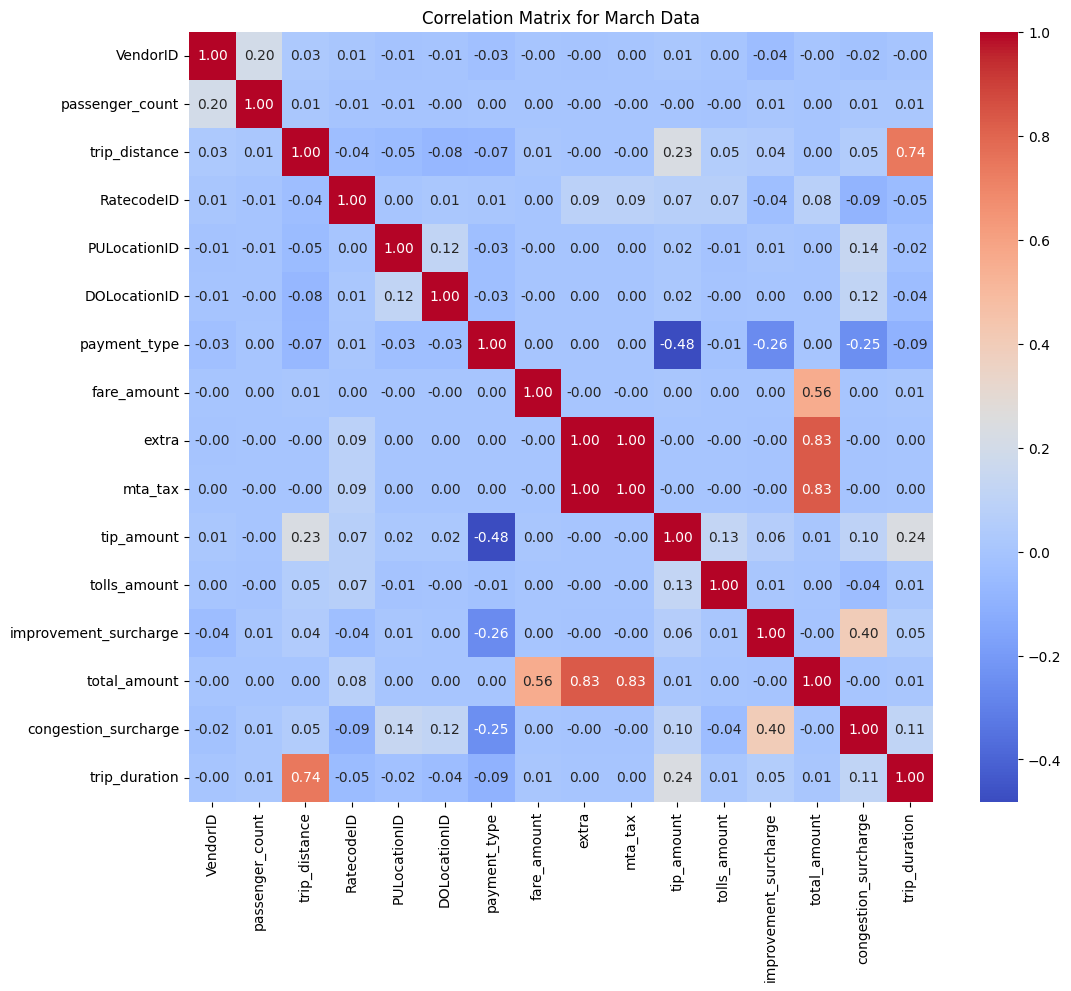

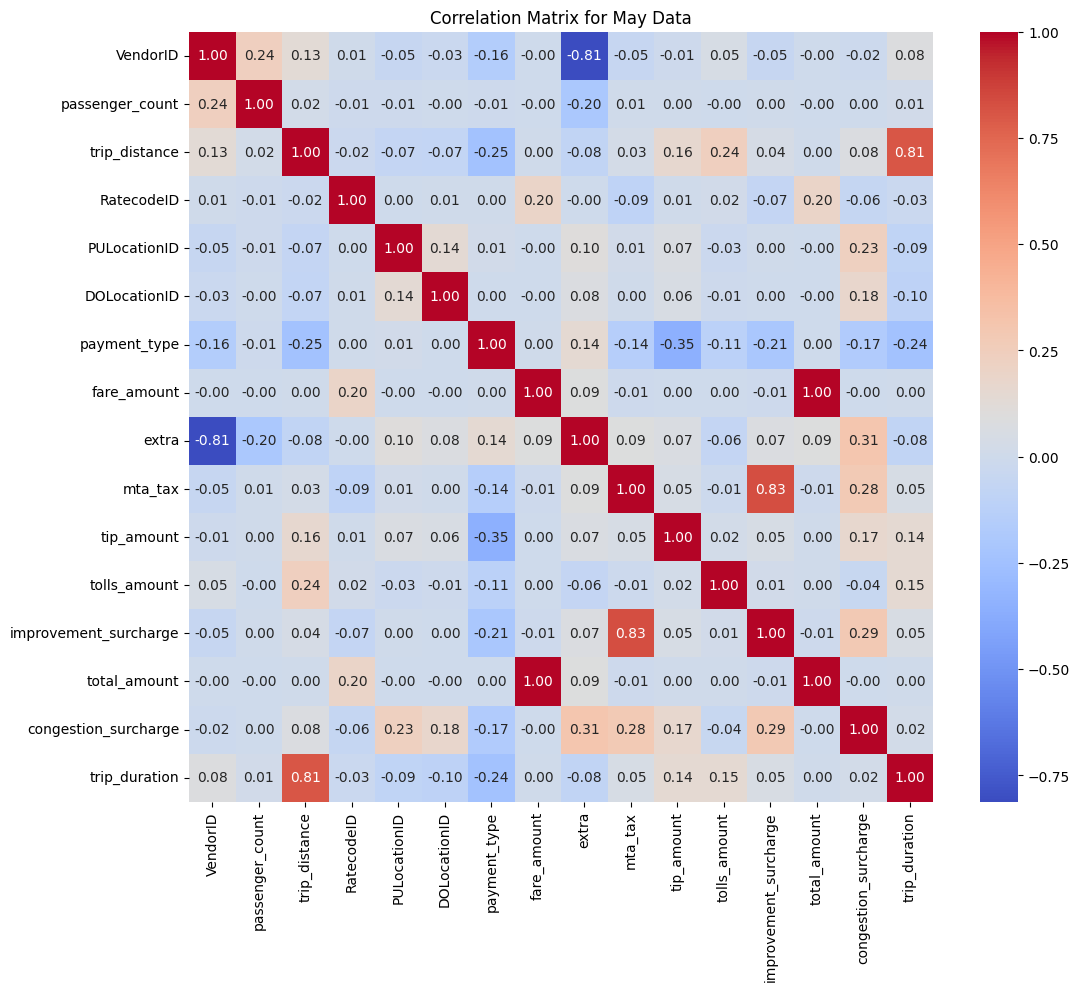

In [ ]:
# Visualize Correlations

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_march, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for March Data')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_may, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for May Data')
plt.show()


In [ ]:
# Feature Importance Based on Correlation

def get_feature_importance_by_correlation(correlation_matrix, target_feature):

  if target_feature not in correlation_matrix.columns:
    return []

  feature_importance = []
  for feature in correlation_matrix.columns:
    if feature != target_feature:
      correlation = correlation_matrix.loc[target_feature, feature]
      feature_importance.append((feature, correlation))

  feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)
  return feature_importance


target_feature = 'trip_duration'
feature_importance_march = get_feature_importance_by_correlation(correlation_matrix_march, target_feature)
feature_importance_may = get_feature_importance_by_correlation(correlation_matrix_may, target_feature)

print("Feature Importance (March) based on correlation with trip_duration:")
for feature, correlation in feature_importance_march:
  print(f"{feature}: {correlation:.3f}")

print("\nFeature Importance (May) based on correlation with trip_duration:")
for feature, correlation in feature_importance_may:
  print(f"{feature}: {correlation:.3f}")


Feature Importance (March) based on correlation with trip_duration:
trip_distance: 0.742
tip_amount: 0.240
congestion_surcharge: 0.114
payment_type: -0.095
improvement_surcharge: 0.052
RatecodeID: -0.048
DOLocationID: -0.042
PULocationID: -0.021
tolls_amount: 0.013
passenger_count: 0.011
fare_amount: 0.008
total_amount: 0.005
VendorID: -0.000
extra: 0.000
mta_tax: 0.000

Feature Importance (May) based on correlation with trip_duration:
trip_distance: 0.808
payment_type: -0.240
tolls_amount: 0.150
tip_amount: 0.144
DOLocationID: -0.102
PULocationID: -0.086
extra: -0.083
VendorID: 0.082
improvement_surcharge: 0.052
mta_tax: 0.048
RatecodeID: -0.026
congestion_surcharge: 0.022
passenger_count: 0.013
total_amount: 0.003
fare_amount: 0.003


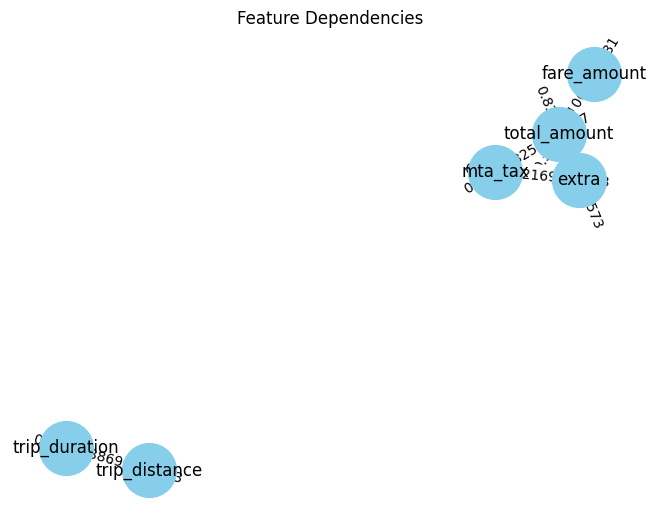

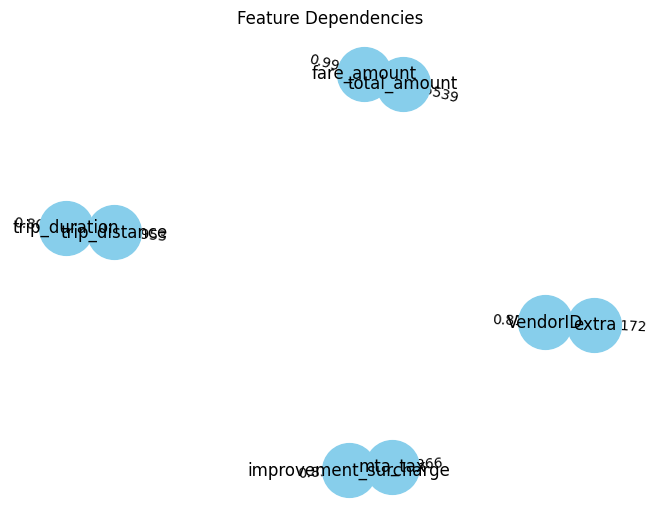

In [ ]:
# Graphical Visualization of Dependencies

import networkx as nx
import matplotlib.pyplot as plt

def visualize_dependencies(dependencies):
  graph = nx.Graph()
  for feature, related_features in dependencies.items():
    for related_feature, correlation in related_features:
      graph.add_edge(feature, related_feature, weight=abs(correlation))

  pos = nx.spring_layout(graph)
  nx.draw(
      graph,
      pos,
      with_labels=True,
      node_color="skyblue",
      node_size=1500,
      edge_cmap=plt.cm.Blues,
      width=[abs(graph[u][v]['weight']) * 2 for u, v in graph.edges()],
  )
  labels = nx.get_edge_attributes(graph, 'weight')
  nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
  plt.title("Feature Dependencies")
  plt.show()

# Visualize dependencies for March and May data
visualize_dependencies(dependencies_march)
visualize_dependencies(dependencies_may)


In [ ]:

# Analyze feature dependencies and correlations

def analyze_feature_dependencies(correlation_matrix, threshold=0.5):

  dependencies = {}
  for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
      column1 = correlation_matrix.columns[i]
      column2 = correlation_matrix.columns[j]
      correlation = correlation_matrix.loc[column1, column2]
      if abs(correlation) > threshold:
        if column1 not in dependencies:
          dependencies[column1] = []
        if column2 not in dependencies:
          dependencies[column2] = []
        dependencies[column1].append((column2, correlation))
        dependencies[column2].append((column1, correlation))
  return dependencies


# Analyze dependencies for March and May data
dependencies_march = analyze_feature_dependencies(correlation_matrix_march)
dependencies_may = analyze_feature_dependencies(correlation_matrix_may)


print("Dependencies in March data:")
for feature, related_features in dependencies_march.items():
  print(f"{feature}:")
  for related_feature, correlation in related_features:
    print(f"  - {related_feature} (Correlation: {correlation:.2f})")

print("\nDependencies in May data:")
for feature, related_features in dependencies_may.items():
  print(f"{feature}:")
  for related_feature, correlation in related_features:
    print(f"  - {related_feature} (Correlation: {correlation:.2f})")


def find_most_influential_variables(dependencies, target_variable):

  if target_variable not in dependencies:
    return []

  related_variables = dependencies[target_variable]
  related_variables.sort(key=lambda x: abs(x[1]), reverse=True)

  return related_variables


# Find most influential variables for trip_duration in March data
most_influential_variables_march = find_most_influential_variables(
    dependencies_march, "trip_duration"
)

# Find most influential variables for trip_duration in May data
most_influential_variables_may = find_most_influential_variables(
    dependencies_may, "trip_duration"
)

print("Most influential variables affecting trip_duration in March:")
for variable, correlation in most_influential_variables_march:
  print(f"- {variable} (Correlation: {correlation:.2f})")

print("\nMost influential variables affecting trip_duration in May:")
for variable, correlation in most_influential_variables_may:
  print(f"- {variable} (Correlation: {correlation:.2f})")


Dependencies in March data:
trip_distance:
  - trip_duration (Correlation: 0.74)
trip_duration:
  - trip_distance (Correlation: 0.74)
fare_amount:
  - total_amount (Correlation: 0.56)
total_amount:
  - fare_amount (Correlation: 0.56)
  - extra (Correlation: 0.83)
  - mta_tax (Correlation: 0.83)
extra:
  - mta_tax (Correlation: 1.00)
  - total_amount (Correlation: 0.83)
mta_tax:
  - extra (Correlation: 1.00)
  - total_amount (Correlation: 0.83)

Dependencies in May data:
VendorID:
  - extra (Correlation: -0.81)
extra:
  - VendorID (Correlation: -0.81)
trip_distance:
  - trip_duration (Correlation: 0.81)
trip_duration:
  - trip_distance (Correlation: 0.81)
fare_amount:
  - total_amount (Correlation: 1.00)
total_amount:
  - fare_amount (Correlation: 1.00)
mta_tax:
  - improvement_surcharge (Correlation: 0.83)
improvement_surcharge:
  - mta_tax (Correlation: 0.83)
Most influential variables affecting trip_duration in March:
- trip_distance (Correlation: 0.74)

Most influential variables af

# create and save the training and evaluation datasets

In [ ]:
# Load the cleaned data into pandas DataFrames

import pandas as pd
march_data_cleaned = pd.read_parquet('yellow_tripdata_2020-03_cleaned.parquet', engine='fastparquet')
may_data_cleaned = pd.read_parquet('yellow_tripdata_2020-05_cleaned.parquet', engine='fastparquet')

print("March Data (Cleaned) Shape:", march_data_cleaned.shape)
print("May Data (Cleaned) Shape:", may_data_cleaned.shape)


March Data (Cleaned) Shape: (2603390, 19)
May Data (Cleaned) Shape: (300466, 19)


In [ ]:
#  Select features for training, add tolls fee into the features for training, and display data

# Assuming you have march_data_cleaned and may_data_cleaned DataFrames loaded

# Select features for training (including tolls_amount)
features_for_training = ['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','passenger_count', 'PULocationID', 'DOLocationID', 'total_amount','congestion_surcharge', 'trip_duration']

# Create training datasets for both March and May
march_training_data = march_data_cleaned[features_for_training]
may_training_data = may_data_cleaned[features_for_training]


# Display the training data (first few rows)
print("March Training Data:")
display(march_training_data.head())

print("\nMay Training Data:")
display(may_training_data.head())

March Training Data:


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tolls_amount,trip_duration
index,,,,,,,,
1,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,193,193,0.0,0.450000
2,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,246,90,0.0,6.966667
3,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,151,238,0.0,3.066667
4,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,79,261,0.0,15.133333
5,2020-03-01 00:04:43,2020-03-01 00:23:17,1.0,3.50,113,142,0.0,18.566667



May Training Data:


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tolls_amount,trip_duration
index,,,,,,,,
0,2020-05-01 00:02:28,2020-05-01 00:18:07,1.0,0.0,234,256,0.0,15.650000
1,2020-05-01 00:23:21,2020-05-01 00:26:01,2.0,0.4,264,264,0.0,2.666667
2,2020-05-01 00:54:58,2020-05-01 00:57:11,1.0,0.3,264,264,0.0,2.216667
3,2020-05-01 00:07:10,2020-05-01 00:12:46,1.0,1.7,107,229,0.0,5.600000
4,2020-05-01 00:55:47,2020-05-01 01:01:54,0.0,0.9,237,262,0.0,6.116667


save the Datasets as Parquet Files

In [ ]:
# save the Datasets as Parquet Files

# Save the training datasets as Parquet files
march_training_data.to_parquet('march_training_data.parquet', engine='fastparquet')
may_training_data.to_parquet('may_training_data.parquet', engine='fastparquet')

print("March training data saved to 'march_training_data.parquet'")
print("May training data saved to 'may_training_data.parquet'")

March training data saved to 'march_training_data.parquet'
May training data saved to 'may_training_data.parquet'


# ***Extra Credit ***


In [ ]:
import pandas as pd

In [ ]:
# Load the January 2020 data into a DataFrame
january_data = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine='fastparquet')

# Load the March 2020 data into a DataFrame
march_data = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine='fastparquet')


In [ ]:
# Print some info or display the DataFrames to check if they loaded correctly
print("January 2020 Data Shape:", january_data.shape)
print("March 2020 Data Shape:", march_data.shape)
display(january_data.head())
display(march_data.head())

process data

In [ ]:
# Convert pickup and dropoff datetime columns to datetime format

if 'tpep_pickup_datetime' in january_data.columns:
  january_data['tpep_pickup_datetime'] = pd.to_datetime(january_data['tpep_pickup_datetime'])

if 'tpep_dropoff_datetime' in january_data.columns:
  january_data['tpep_dropoff_datetime'] = pd.to_datetime(january_data['tpep_dropoff_datetime'])

if 'tpep_pickup_datetime' in march_data.columns:
  march_data['tpep_pickup_datetime'] = pd.to_datetime(march_data['tpep_pickup_datetime'])

if 'tpep_dropoff_datetime' in march_data.columns:
  march_data['tpep_dropoff_datetime'] = pd.to_datetime(march_data['tpep_dropoff_datetime'])


In [ ]:
# Calculate trip duration in minutes for both datasets
if 'trip_duration' not in january_data.columns:
  if 'tpep_pickup_datetime' in january_data.columns and 'tpep_dropoff_datetime' in january_data.columns:
    january_data['trip_duration'] = (pd.to_datetime(january_data['tpep_dropoff_datetime']) - pd.to_datetime(january_data['tpep_pickup_datetime'])).dt.total_seconds()
    january_data['trip_duration_minutes'] = january_data['trip_duration'] / 60


if 'trip_duration' not in march_data.columns:
  if 'tpep_pickup_datetime' in march_data.columns and 'tpep_dropoff_datetime' in march_data.columns:
    march_data['trip_duration'] = (pd.to_datetime(march_data['tpep_dropoff_datetime']) - pd.to_datetime(march_data['tpep_pickup_datetime'])).dt.total_seconds()
    march_data['trip_duration_minutes'] = march_data['trip_duration'] / 60


In [ ]:
# Handle missing values in January data
january_data_filled = january_data.copy()

In [ ]:
# Fill missing values in numerical columns with the mean
numerical_cols_jan = january_data_filled.select_dtypes(include=['number']).columns
january_data_filled[numerical_cols_jan] = january_data_filled[numerical_cols_jan].fillna(january_data_filled[numerical_cols_jan].mean())


In [ ]:
# Fill missing values in categorical columns with the mode
categorical_cols_jan = january_data_filled.select_dtypes(include=['object']).columns
for col in categorical_cols_jan:
  january_data_filled[col] = january_data_filled[col].fillna(january_data_filled[col].mode()[0])

In [ ]:
# Handle missing values in March data (already handled earlier, but ensuring consistency)
march_data_filled = march_data.copy()

numerical_cols_mar = march_data_filled.select_dtypes(include=['number']).columns
march_data_filled[numerical_cols_mar] = march_data_filled[numerical_cols_mar].fillna(march_data_filled[numerical_cols_mar].mean())

categorical_cols_mar = march_data_filled.select_dtypes(include=['object']).columns
for col in categorical_cols_mar:
  march_data_filled[col] = march_data_filled[col].fillna(march_data_filled[col].mode()[0])

In [ ]:
# Compare column names and data types
print("January Columns and Data Types:")
print(january_data_filled.dtypes)

print("\nMarch Columns and Data Types:")
print(march_data_filled.dtypes)

In [ ]:
# Print information about the handling of missing values and inconsistencies.
print("\nMissing values in January data filled with mean for numerical and mode for categorical.")
print("Missing values in March data filled with mean for numerical and mode for categorical.")
print("Data type inconsistencies checked between January and March datasets.")


Analyze Key Metrics

In [ ]:
# Calculate total number of trips, average trip distance, and total revenue for each month
total_trips_january = january_data_filled.shape[0]
average_trip_distance_january = january_data_filled['trip_distance'].mean()
total_revenue_january = january_data_filled['fare_amount'].sum()

total_trips_march = march_data_filled.shape[0]
average_trip_distance_march = march_data_filled['trip_distance'].mean()
total_revenue_march = march_data_filled['fare_amount'].sum()

In [ ]:
# Average Fare Amount january
average_fare_amount_january = january_data_filled['fare_amount'].mean()

# Average Trip Duration (minutes)
average_trip_duration_january = january_data_filled['trip_duration_minutes'].mean()

# Average Fare Amount march # This line was added to calculate the average fare amount for March
average_fare_amount_march = march_data_filled['fare_amount'].mean()

# Average Trip Duration (minutes) march # This line was added to calculate the average trip duration for March
average_trip_duration_march = march_data_filled['trip_duration_minutes'].mean()

In [ ]:
print("January 2020:")
print(f"Total Trips: {total_trips_january}")
print(f"Average Trip Distance: {average_trip_distance_january:.2f} miles")
print(f"Total Revenue: ${total_revenue_january:.2f}")
print(f"Average Fare Amount: ${average_fare_amount_january:.2f}")
print(f"Average Trip Duration: {average_trip_duration_january:.2f} minutes")

print("\nMarch 2020:")
print(f"Total Trips: {total_trips_march}")
print(f"Average Trip Distance: {average_trip_distance_march:.2f} miles")
print(f"Total Revenue: ${total_revenue_march:.2f}")
print(f"Average Fare Amount: ${average_fare_amount_march:.2f}")
print(f"Average Trip Duration: {average_trip_duration_march:.2f} minutes")

In [ ]:
# Compare key metrics between January and March

print("Key Metric Comparison (January vs. March):")

print(f"- Total Trips: January: {total_trips_january}, March: {total_trips_march} (Difference: {total_trips_march - total_trips_january})")
print(f"- Average Trip Distance: January: {average_trip_distance_january:.2f} miles, March: {average_trip_distance_march:.2f} miles (Difference: {average_trip_distance_march - average_trip_distance_january:.2f} miles)")
print(f"- Total Revenue: January: ${total_revenue_january:.2f}, March: ${total_revenue_march:.2f} (Difference: ${total_revenue_march - total_revenue_january:.2f})")
print(f"- Average Fare Amount: January: {average_fare_amount_january:.2f} miles, March: {average_fare_amount_march:.2f} miles (Difference: {average_fare_amount_march - average_fare_amount_january:.2f} miles)")
print(f"- Average Trip Duration: {average_trip_duration_january:.2f}, March: {average_trip_duration_march:.2f} (Difference: {average_trip_duration_march - average_trip_duration_january:.2f})") # Corrected the variable name and the calculation

# You can also compare the average trip duration, average fare amount, and other relevant metrics in a similar way.

**Visualize the Changes between January and March**

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
months = ['January', 'March']
total_trips = [total_trips_january, total_trips_march]
average_trip_distances = [average_trip_distance_january, average_trip_distance_march]
average_fare_amounts = [average_fare_amount_january, average_fare_amount_march]
total_revenues = [total_revenue_january, total_revenue_march]
average_trip_durations = [average_trip_duration_january, average_trip_duration_march]

In [ ]:
# Visualize Total Number of Trips
plt.figure(figsize=(8, 6))
plt.bar(months, total_trips)
plt.xlabel('Month')
plt.ylabel('Total Number of Trips')
plt.title('Total Number of Trips (January vs. March)')
plt.show()

In [ ]:
# Visualize Average Trip Distance
plt.figure(figsize=(8, 6))
plt.bar(months, average_trip_distances)
plt.xlabel('Month')
plt.ylabel('Average Trip Distance (Miles)')
plt.title('Average Trip Distance (January vs. March)')
plt.show()

In [ ]:
# Visualize Average Fare Amount
plt.figure(figsize=(8, 6))
plt.bar(months, average_fare_amounts)
plt.xlabel('Month')
plt.ylabel('Average Fare Amount ($)')
plt.title('Average Fare Amount (January vs. March)')
plt.show()


In [ ]:
# Visualize Total Revenue
plt.figure(figsize=(8, 6))
plt.bar(months, total_revenues)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue (January vs. March)')
plt.show()

In [ ]:
# Visualize Average Trip Duration
plt.figure(figsize=(8, 6))
plt.bar(months, average_trip_durations)
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title('Average Trip Duration (January vs. March)')
plt.show()


Overall Trends:
- Taxi ridership decreased significantly between January and March 2020, likely due to the early stages of the COVID-19 pandemic.
- Average trip distance remained relatively stable, suggesting that the change was more about the overall number of trips rather than travel patterns.
- Total revenue experienced a considerable drop, which aligns with the reduced number of trips.
- Average fare amount also experienced a slight drop.
- Average trip duration remained stable.

Possible Insights:
- The COVID-19 pandemic had a notable impact on the NYC taxi industry.
- Understanding the factors contributing to the change in ridership is crucial.
- Further analysis of passenger count, pickup/drop-off locations, and time of day could provide more detailed insights.
- Considering the correlation between trip distance and trip duration for insights into trip efficiency and profitability.
- Analysing fare amount and revenue in relation to other factors like time of the day, location or passenger count, etc.

Further Investigation:
- Analyze the impact on specific areas or boroughs of NYC.
- Look into the types of trips that were most affected.
- Investigate the potential correlation between COVID-19 related events and the taxi industry.
- Assess the recovery of the taxi industry in subsequent months.